<a href="https://colab.research.google.com/github/Suman5501/AI-lab-assignment/blob/main/_2_CSL5402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Small project -based AI Lab Assignments
###**ASSIGNMENT - 02**


Un-Supervised Machine Learning(K-means Clustering, KNN):
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### K means on Adult Dataset

In [ ]:
adult_dataset = pd.read_csv('/content/adult.csv',skipinitialspace=True)

In [ ]:
adult_dataset.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Renaming columns 
adult_dataset.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'captialgain', 'capitalloss',
       'hoursperweek', 'native-country', 'class']

In [ ]:
adult_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,captialgain,capitalloss,hoursperweek,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             8600 non-null   int64 
 1   workclass       8600 non-null   object
 2   fnlwgt          8600 non-null   int64 
 3   education       8600 non-null   object
 4   education-num   8600 non-null   int64 
 5   marital-status  8600 non-null   object
 6   occupation      8600 non-null   object
 7   relationship    8600 non-null   object
 8   race            8600 non-null   object
 9   gender          8600 non-null   object
 10  captialgain     8600 non-null   int64 
 11  capitalloss     8600 non-null   int64 
 12  hoursperweek    8600 non-null   int64 
 13  native-country  8600 non-null   object
 14  class           8600 non-null   object
dtypes: int64(6), object(9)
memory usage: 1007.9+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix

In [ ]:
adult_dataset_encoded = pd.get_dummies(data=adult_dataset,columns=adult_dataset.select_dtypes(include=[object]).columns,drop_first=True)

In [ ]:
adult_dataset_encoded.head()

,age,fnlwgt,education-num,captialgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_>50K
0,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
adult_dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 100 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        8600 non-null   int64
 1   fnlwgt                                     8600 non-null   int64
 2   education-num                              8600 non-null   int64
 3   captialgain                                8600 non-null   int64
 4   capitalloss                                8600 non-null   int64
 5   hoursperweek                               8600 non-null   int64
 6   workclass_Federal-gov                      8600 non-null   uint8
 7   workclass_Local-gov                        8600 non-null   uint8
 8   workclass_Never-worked                     8600 non-null   uint8
 9   workclass_Private                          8600 non-null   uint8
 10  workclass_Self-emp-inc                     8600

In [ ]:
X = adult_dataset_encoded.drop('class_>50K',axis=1)
y = adult_dataset_encoded['class_>50K']

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

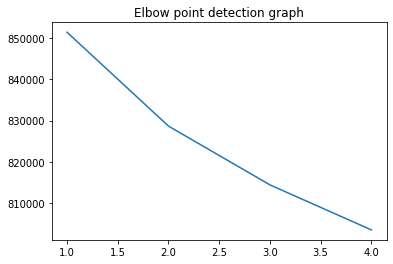

In [ ]:
# finding value of k using elbow method
inertia = []
for k in range(1,5):
    k_cluster = KMeans(n_clusters=k)
    k_cluster.fit_transform(X_scaled)
    inertia.append(k_cluster.inertia_)

plt.plot(range(1,5),inertia)
plt.title("Elbow point detection graph")
plt.show()

**K=2 can be treated as a elbow point here**

In [ ]:
# so we choose k = 2
cluster_model = KMeans(n_clusters=2,random_state=15)
cluster_model.fit(X)

KMeans(n_clusters=2, random_state=15)

In [ ]:
K_means_pred = cluster_model.labels_
K_means_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [ ]:
print("Classification Report using K means Clustering \n")
print(classification_report(y,K_means_pred))

Classification Report using K means Clustering 

              precision    recall  f1-score   support

           0       0.79      0.27      0.40      6553
           1       0.25      0.77      0.37      2047

    accuracy                           0.39      8600
   macro avg       0.52      0.52      0.39      8600
weighted avg       0.66      0.39      0.39      8600



In [ ]:
cm = confusion_matrix(y, K_means_pred)
cm
accuracy_score(y, K_means_pred)

0.38546511627906976

### Elbow and Scatter Graphs of adult dataset

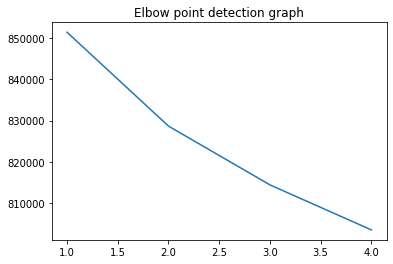

In [ ]:
plt.plot(range(1,5),inertia)
plt.title("Elbow point detection graph")
plt.show()

In [ ]:
num_cols = adult_dataset._get_numeric_data().columns

In [ ]:
adult_dataset['pred'] = K_means_pred


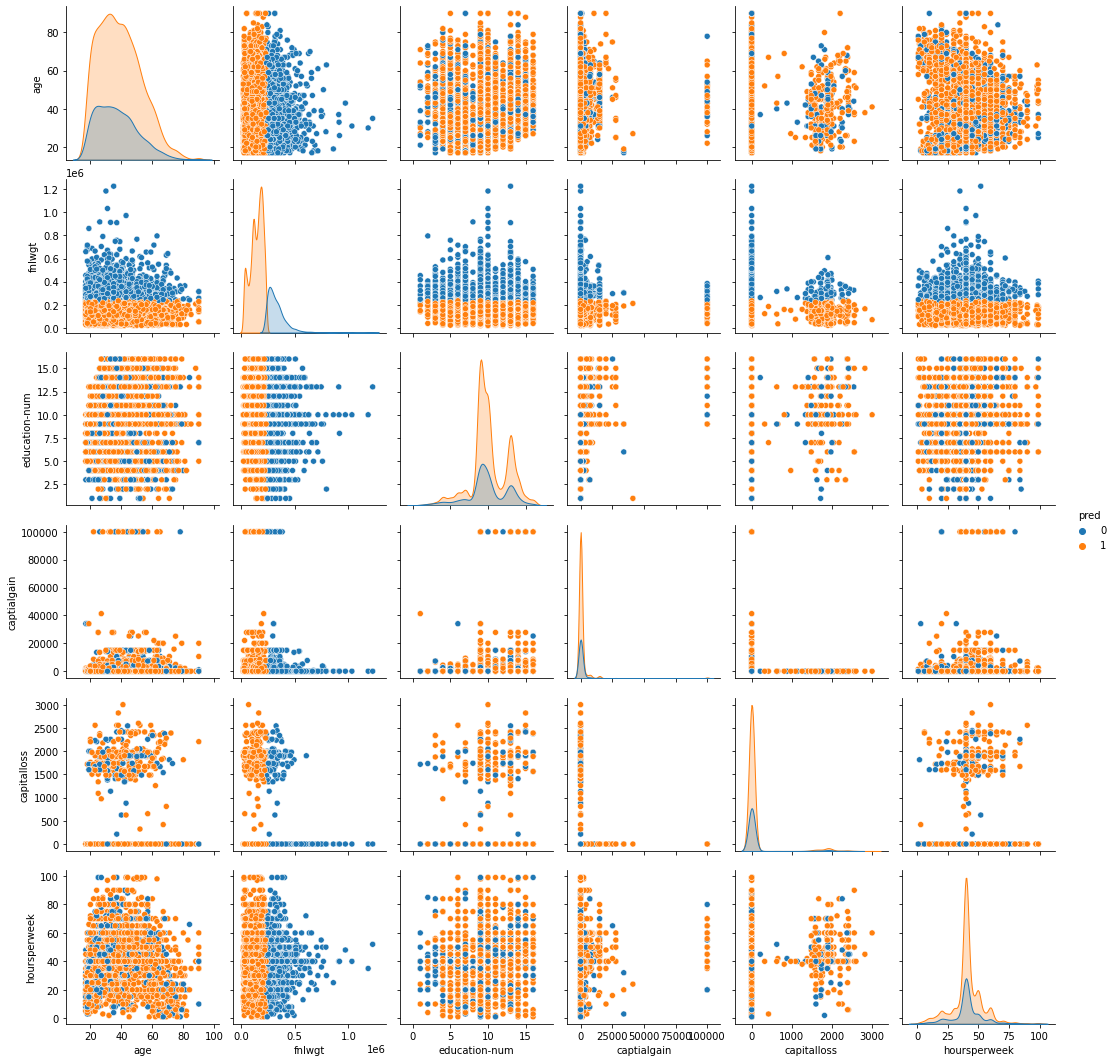

In [ ]:
sns.pairplot(data=adult_dataset,vars=num_cols,hue='pred')

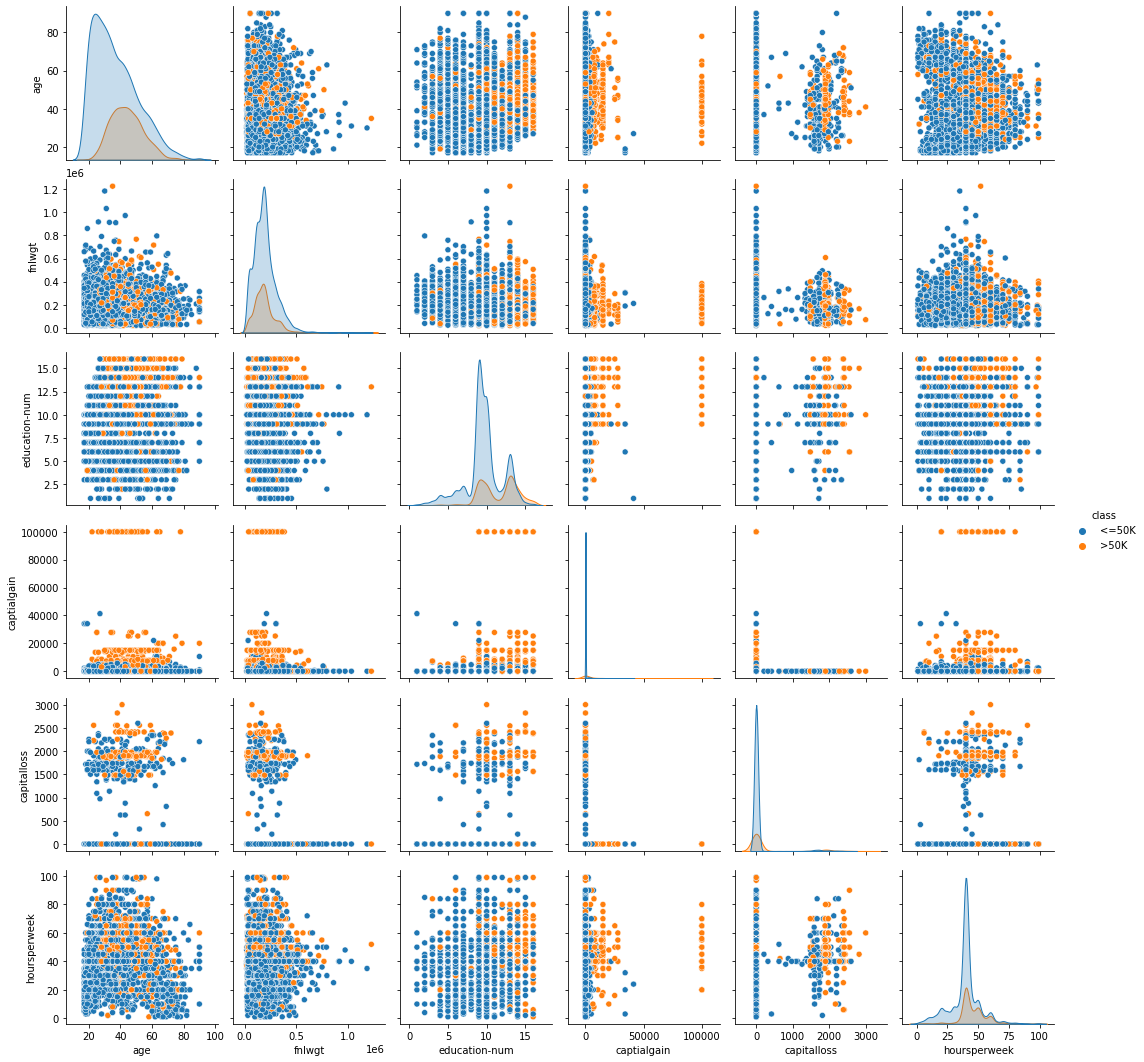

In [ ]:
# Actual values
sns.pairplot(data=adult_dataset,vars=num_cols,hue='class')

**KNN on heart dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
heart_dataset=pd.read_csv('/content/heart.csv',skipinitialspace=True)

In [ ]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report , accuracy_score

In [ ]:
Xheart = heart_dataset.iloc[:,:-1].values
yheart = heart_dataset.iloc[:,13].values

In [ ]:
X_trainh, X_testh, y_trainh, y_testh =  train_test_split(Xheart,yheart,test_size = 0.25, random_state= 0)

In [ ]:
sc_X = StandardScaler()
X_trainh = sc_X.fit_transform(X_trainh)
X_testh = sc_X.transform(X_testh)

In [ ]:
# finding value of k using elbow method
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_trainh,y_trainh)
 pred_i = knn.predict(X_testh)
 error_rate.append(np.mean(pred_i != y_testh))

Text(0, 0.5, 'Error Rate')

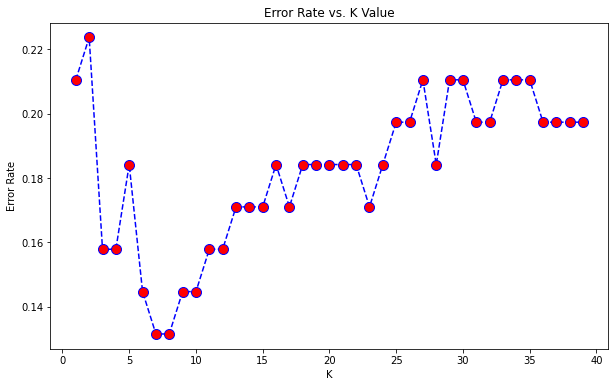

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#We choose k = 7 as an elbow point here
classifierh = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifierh = classifierh.fit(X_trainh,y_trainh)

In [ ]:
y_predh = classifierh.predict(X_testh)

In [ ]:
print("Classification Report for KNN(Heart Dataset)")
print(classification_report(y_testh,y_predh))

Classification Report for KNN(Heart Dataset)
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.85      0.93      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76



Text(0, 0.5, 'Error Rate')

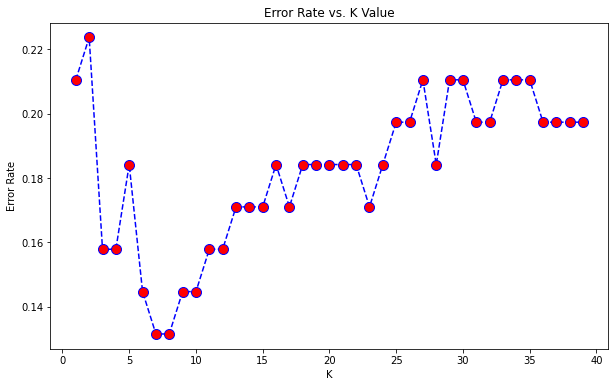

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

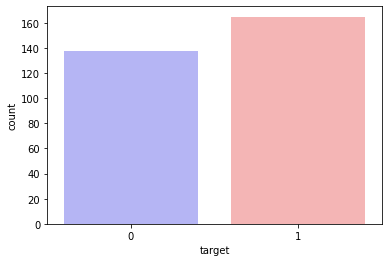

In [ ]:
import seaborn as sns
sns.countplot(x="target", data=heart_dataset, palette="bwr")
plt.show()

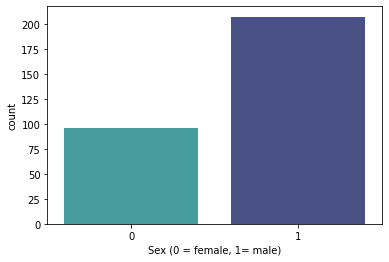

In [ ]:
sns.countplot(x='sex', data=heart_dataset, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

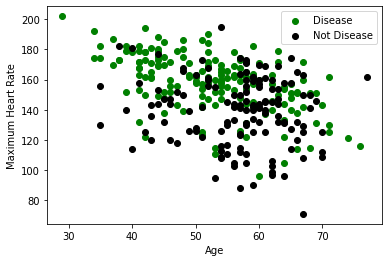

In [ ]:
plt.scatter(x=heart_dataset.age[heart_dataset.target==1], y=heart_dataset.thalach[(heart_dataset.target==1)], c="green")
plt.scatter(x=heart_dataset.age[heart_dataset.target==0], y=heart_dataset.thalach[(heart_dataset.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()